In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import math
import scipy as sp
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.style'] = 'normal'

In [3]:
df_with_controls_filtered=pd.read_excel('/Users/rebek/Dropbox/phd_research/task-based_analysis/task_based_df_lab_division.xlsx', index_col=[0])

In [7]:
df_with_controls_filtered.head()

,team,room,team_success,task_name_pair_SEQ,task_name_pair_COND,interval_starting_task,interval_ending_task,checkpoint_solution_time,time_elapsed_SEQ,time_elapsed_COND,...,gender,education,bin_num,gender_blau,acq_var,acq_avg,meetfre_var,meetfre_avg,ratio_pos,ratio_neg
0,10,Sherlock,1,"('START', 'VS')","('START', 'VS')",START,VS,12,12,12,...,1.25,3.75,0,0.375,16.48,4.83,2.69,5.0,0.142857,0.000000
1,10,Sherlock,1,"('VS', 'Sts')","('START', 'Sts')",VS,Sts,33,21,33,...,1.25,3.75,0,0.375,16.48,4.83,2.69,5.0,0.000000,0.000000
2,10,Sherlock,1,"('Sts', 'ColC')","('START', 'ColC')",Sts,ColC,72,39,72,...,1.25,3.75,0,0.375,16.48,4.83,2.69,5.0,0.307692,0.000000
3,10,Sherlock,1,"('ColC', 'Tob')","('START', 'Tob')",ColC,Tob,130,58,130,...,1.25,3.75,0,0.375,16.48,4.83,2.69,5.0,0.285714,0.095238
4,10,Sherlock,1,"('Tob', 'ShMu')","('START', 'ShMu')",Tob,ShMu,186,56,186,...,1.25,3.75,0,0.375,16.48,4.83,2.69,5.0,0.200000,0.000000


## Correlations

In [5]:
df_for_vif=df_with_controls_filtered[['education', 'age','gender', 'acq_avg', 'task_type_x',
       'meetfre_avg', 'bin_num', 'normalized_avg_cc', 'std_of_initiated_interaction_counts_SEQ', 'ratio_pos', 'ratio_neg']]

In [6]:
df_for_vif.corr()

,education,age,gender,acq_avg,task_type_x,meetfre_avg,bin_num,normalized_avg_cc,std_of_initiated_interaction_counts_SEQ,ratio_pos,ratio_neg
education,1.000000,0.593341,0.101728,0.248892,0.011011,-0.005972,-0.131657,-0.126317,0.028490,-0.047080,-0.178018
age,0.593341,1.000000,0.226686,0.553056,-0.044093,-0.074354,-0.096258,-0.105047,0.016580,-0.047112,-0.186472
gender,0.101728,0.226686,1.000000,0.032286,-0.026155,-0.387603,0.049015,0.074285,-0.030481,0.037883,-0.026464
acq_avg,0.248892,0.553056,0.032286,1.000000,-0.062365,0.155248,-0.428890,-0.167253,0.047281,-0.053416,-0.080062
task_type_x,0.011011,-0.044093,-0.026155,-0.062365,1.000000,0.016395,0.029510,0.076557,0.461385,0.042946,0.001607
meetfre_avg,-0.005972,-0.074354,-0.387603,0.155248,0.016395,1.000000,-0.248746,-0.116978,0.000885,0.054398,-0.092117
bin_num,-0.131657,-0.096258,0.049015,-0.428890,0.029510,-0.248746,1.000000,0.182503,0.000326,-0.029113,-0.056707
normalized_avg_cc,-0.126317,-0.105047,0.074285,-0.167253,0.076557,-0.116978,0.182503,1.000000,0.019345,-0.037674,0.005793
std_of_initiated_interaction_counts_SEQ,0.028490,0.016580,-0.030481,0.047281,0.461385,0.000885,0.000326,0.019345,1.000000,-0.011294,0.018537
ratio_pos,-0.047080,-0.047112,0.037883,-0.053416,0.042946,0.054398,-0.029113,-0.037674,-0.011294,1.000000,0.051575


In [7]:
df_for_vif.columns

Index(['education', 'age', 'gender', 'acq_avg', 'task_type_x', 'meetfre_avg',
       'bin_num', 'normalized_avg_cc',
       'std_of_initiated_interaction_counts_SEQ', 'ratio_pos', 'ratio_neg'],
      dtype='object')

## Problem-solving time

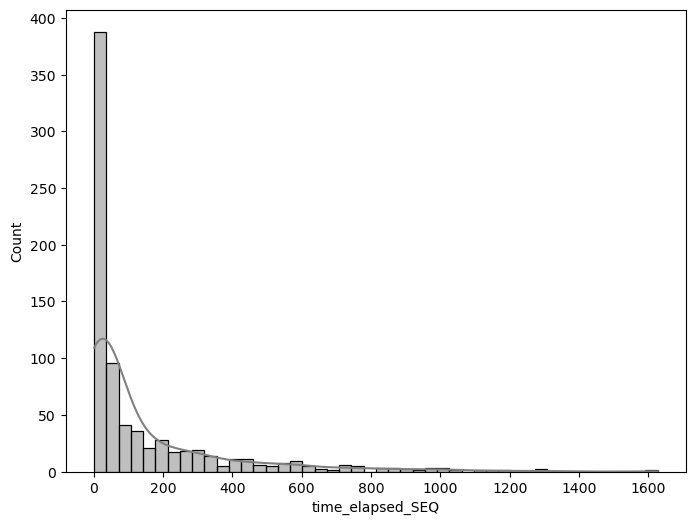

In [8]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(df_with_controls_filtered.time_elapsed_SEQ, color='grey', kde=True)
plt.show()

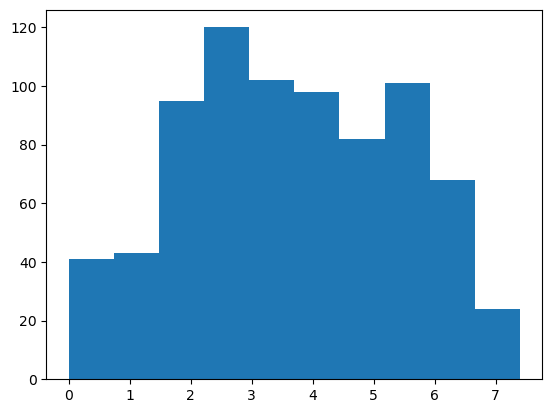

In [9]:
plt.hist(np.log(df_with_controls_filtered.time_elapsed_SEQ))
plt.show()

In [10]:
y = df_with_controls_filtered['time_elapsed_SEQ']

# Transformations
transformations = {
    'Original': y,
    'Log': np.log(y + 1e-5),  # add a small constant to avoid log(0)
    'Square Root': np.sqrt(y),
    'Inverse': 1 / (y + 1e-5),  # add a small constant to avoid division by zero
    'Box-Cox': stats.boxcox(y[y > 0])[0]
}

results = pd.DataFrame(transformations) # columns=['Transformation', 'R-squared', 'MSE'])

In [11]:
results

,Original,Log,Square Root,Inverse,Box-Cox
0,12,2.484907,3.464102,0.083333,2.471812
1,21,3.044523,4.582576,0.047619,3.024881
2,39,3.663562,6.244998,0.025641,3.635146
3,58,4.060443,7.615773,0.017241,4.025557
4,56,4.025352,7.483315,0.017857,3.991065
...,...,...,...,...,...
916,17,2.833214,4.123106,0.058823,2.816199
917,84,4.430817,9.165151,0.011905,4.389298
918,16,2.772589,4.000000,0.062500,2.756293
919,85,4.442651,9.219544,0.011765,4.400911


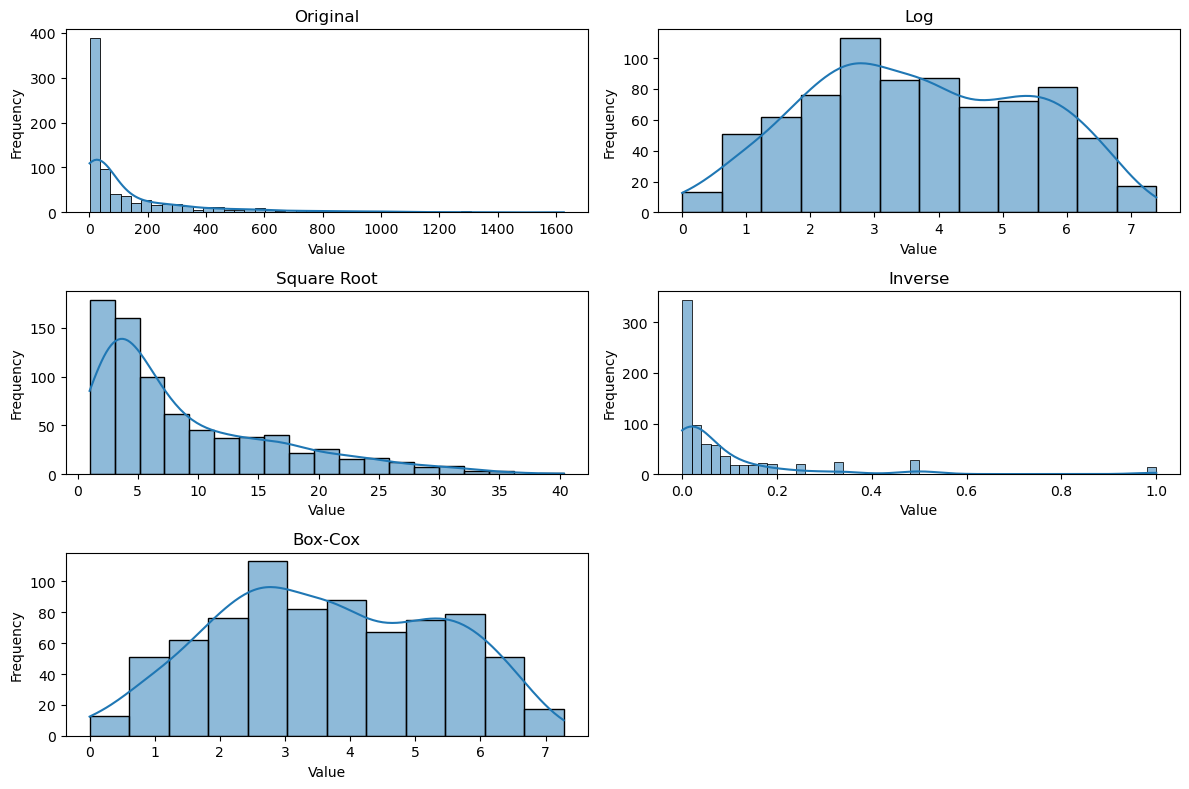

In [12]:
plt.figure(figsize=(12, 8))
num_transformations = len(transformations)
num_rows = (num_transformations + 1) // 2  # Calculate number of rows needed

for i, (name, transformed_y) in enumerate(transformations.items()):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(transformed_y, kde=True)
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## MODELS

**Standardization** => all results are the same so did not standardize for better interpretability

In [13]:
# from sklearn.preprocessing import StandardScaler

# predictors_of_interest = [
#     'task_type_x',
#     'normalized_avg_cc',
#     'std_of_initiated_interaction_counts_SEQ',
#     'education',
#     'gender_blau',
#     'acq_avg',
#     'meetfre_avg',
#     'bin_num',
#     'ratio_pos',
#     'ratio_neg'
# ]

# # Create a copy of the DataFrame to avoid modifying the original data
# df_standardized = df_with_controls_filtered.copy()

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Standardize the predictors
# df_standardized[predictors_of_interest] = scaler.fit_transform(df_standardized[predictors_of_interest])

-----------------------------------------------------------------------------------

**Generalized Linear Model (GLM) with a Gamma distribution and a log link function**

- for continuous, positively skewed data (Gamma),
- can handle the zeros by treating them as actual observations rather than errors

In [14]:
import statsmodels.api as sm

model0 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + age + education + gender_blau + acq_avg + meetfre_avg + bin_num', 
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model0.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      766
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                          2.9472
Method:                          IRLS   Log-Likelihood:                -4397.6
Date:                Sun, 15 Dec 2024   Deviance:                       1484.7
Time:                        17:53:26   Pearson chi2:                 2.26e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.1838
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8847      0.520      7.475      0.000       2.866       4.903
task_type_x     1.5931      0.131     12.205      0.000       1.337       1.849
age             0.0039      0.011      0.358      0.720      -0.017       0.025
education       0.0021      0.110      0.019      0.985      -0.213       0.217
gender_blau     0.1200      0.404      0.297      0.766      -0.671       0.911
acq_avg         0.0329      0.014      2.373      0.018       0.006       0.060
meetfre_avg    -0.0704      0.075     -0.944      0.345      -0.217       0.076
bin_num         0.2558      0.171      1.495      0.135      -0.080       0.591
===============================================================================
"""

In [15]:
def extract_coef_df(glm_results):
    """
    Extracts coefficients from a GLM results object and return a DataFrame with
    predictors, their coeffs, exponentiated coeffs, and percentage changes.
    
    Params:
        glm_results: GLM results object from statsmodels
        
    Returna a df containing the coeff info.
    """
    
    # geting the summary frame from the model results
    summary_frame = glm_results.summary2().tables[1]
    
    coef_df = pd.DataFrame({
        #'Predictor': summary_frame.index,
        'Coefficient': summary_frame['Coef.'],
        'Exp(Coefficient)': np.exp(summary_frame['Coef.']),
    })
    
    # calulate percentage change
    coef_df['Percentage Change (%)'] = (coef_df['Exp(Coefficient)'] - 1) * 100
    
    return coef_df

In [16]:
M0_coef_df=extract_coef_df(model0)
M0_coef_df

,Coefficient,Exp(Coefficient),Percentage Change (%)
Intercept,3.884684,48.651580,4765.157981
task_type_x,1.593068,4.918816,391.881563
age,0.003859,1.003866,0.386643
education,0.002129,1.002131,0.213135
gender_blau,0.120007,1.127504,12.750437
acq_avg,0.032929,1.033477,3.347730
meetfre_avg,-0.070430,0.931993,-6.800702
bin_num,0.255829,1.291532,29.153182


Coefficient: how much the expected log of task-solving time changes with a one-unit increase in the predictor variable, holding all other variables constant. 

**Acquaintanceship** has a small positive effect. Eg. task-solving time is 30 sec. In the case of an unit increase in avg acquaintanceship, the task solving time will be 31.091 sec.

In [17]:
model1 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + age + education + gender_blau + acq_avg + meetfre_avg + bin_num + normalized_avg_cc + std_of_initiated_interaction_counts_SEQ', 
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model1.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      764
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                          1.3099
Method:                          IRLS   Log-Likelihood:                -4061.0
Date:                Sun, 15 Dec 2024   Deviance:                       821.52
Time:                        17:53:26   Pearson chi2:                 1.00e+03
No. Iterations:                    48   Pseudo R-squ. (CS):             0.6708
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.0498      0.412      2.548      0.011       0.242       1.857
task_type_x                                 0.6199      0.099      6.292      0.000       0.427       0.813
age                                         0.0153      0.007      2.132      0.033       0.001       0.029
education                                   0.0013      0.073      0.018      0.986      -0.142       0.145
gender_blau                                 0.1927      0.270      0.715      0.475      -0.336       0.721
acq_avg                                     0.0052      0.009      0.554      0.579      -0.013       0.023
meetfre_avg                                -0.0083      0.050     -0.167      0.867      -0.106       0.089
bin_num                                     0.0890      0.115      0.774      0.439      -0.136       0.314
normalized_avg_cc                           2.2418      0.308      7.268      0.000       1.637       2.846
std_of_initiated_interaction_counts_SEQ     0.1357      0.005     26.097      0.000       0.125       0.146
===========================================================================================================
"""

In [18]:
M1_coef_df=extract_coef_df(model1)
M1_coef_df

,Coefficient,Exp(Coefficient),Percentage Change (%)
Intercept,1.049765,2.856978,185.697839
task_type_x,0.619872,1.858691,85.869068
age,0.015315,1.015433,1.543296
education,0.001328,1.001329,0.132934
gender_blau,0.192745,1.212574,21.257379
acq_avg,0.005150,1.005163,0.516329
meetfre_avg,-0.008328,0.991707,-0.829302
bin_num,0.088979,1.093058,9.305822
normalized_avg_cc,2.241835,9.410580,841.058006
std_of_initiated_interaction_counts_SEQ,0.135690,1.145327,14.532734


- Acquaintanceship: disappears.

- Age: tiny positive effect.
    
- **Lab. division:** very strong, positive effect. Task-solving time: 30, lab. div. increases -> TST: 271.142

- **Participation inequality:** positive effect. Task-solving time: 30, partic. inequality increases -> 34.303

In [19]:
model2 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + normalized_avg_cc + std_of_initiated_interaction_counts_SEQ + task_type_x*normalized_avg_cc + task_type_x*std_of_initiated_interaction_counts_SEQ + age + education + gender_blau + acq_avg + meetfre_avg + bin_num', 
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model2.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      762
Model Family:                   Gamma   Df Model:                           11
Link Function:                    log   Scale:                          1.0384
Method:                          IRLS   Log-Likelihood:                -3960.9
Date:                Sun, 15 Dec 2024   Deviance:                       662.82
Time:                        17:53:26   Pearson chi2:                     791.
No. Iterations:                    45   Pseudo R-squ. (CS):             0.7979
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.7806      0.373      2.091      0.037       0.049       1.512
task_type_x                                             0.5312      0.497      1.070      0.285      -0.442       1.504
normalized_avg_cc                                       1.8388      0.297      6.186      0.000       1.256       2.421
std_of_initiated_interaction_counts_SEQ                 0.2678      0.010     27.517      0.000       0.249       0.287
task_type_x:normalized_avg_cc                           1.8828      0.721      2.611      0.009       0.469       3.296
task_type_x:std_of_initiated_interaction_counts_SEQ    -0.1911      0.011    -17.280      0.000      -0.213      -0.169
age                                                     0.0189      0.006      2.948      0.003       0.006       0.031
education                                              -0.0011      0.065     -0.017      0.987      -0.129       0.127
gender_blau                                             0.1702      0.240      0.708      0.479      -0.301       0.641
acq_avg                                                -0.0114      0.008     -1.362      0.173      -0.028       0.005
meetfre_avg                                             0.0041      0.044      0.092      0.927      -0.083       0.091
bin_num                                                -0.0700      0.103     -0.681      0.496      -0.271       0.131
=======================================================================================================================
"""

In [20]:
M2_coef_df=extract_coef_df(model2)
M2_coef_df

,Coefficient,Exp(Coefficient),Percentage Change (%)
Intercept,0.780593,2.182766,118.276594
task_type_x,0.531216,1.700999,70.099943
normalized_avg_cc,1.838811,6.289059,528.905924
std_of_initiated_interaction_counts_SEQ,0.267829,1.307124,30.712401
task_type_x:normalized_avg_cc,1.882784,6.571778,557.177781
task_type_x:std_of_initiated_interaction_counts_SEQ,-0.191096,0.826053,-17.394679
age,0.018860,1.019039,1.903862
education,-0.001092,0.998908,-0.109165
gender_blau,0.170187,1.185527,18.552674
acq_avg,-0.011358,0.988706,-1.129415


## Decompose interactions

In [21]:
# get predictions and confidence intervals
def get_predictions_and_ci(df, model):
    predictions = model.get_prediction(df)
    df['predicted'] = predictions.predicted_mean
    df['ci_lower'] = predictions.conf_int()[:, 0]
    df['ci_upper'] = predictions.conf_int()[:, 1]
    return df

# Df for exploration and exploitation for normalized_avg_cc (lab. division)
normalized_avg_cc_values = np.linspace(df_with_controls_filtered['normalized_avg_cc'].min(),
                                       df_with_controls_filtered['normalized_avg_cc'].max(), 100)

# Df for exploration and exploitation
exploration_df = pd.DataFrame({
    'normalized_avg_cc': normalized_avg_cc_values,
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),  # mean for the constant
    'task_type_x': 0  # Exploration
})

exploitation_df = pd.DataFrame({
    'normalized_avg_cc': normalized_avg_cc_values,
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),
    'task_type_x': 1  # Exploitation
})


interaction_df_cc = pd.concat([exploration_df, exploitation_df])

# adding controls as averages
interaction_df_cc['education'] = df_with_controls_filtered['education'].mean()
interaction_df_cc['gender_blau'] = df_with_controls_filtered['gender_blau'].mean()
interaction_df_cc['acq_avg'] = df_with_controls_filtered['acq_avg'].mean()
interaction_df_cc['meetfre_avg'] = df_with_controls_filtered['meetfre_avg'].mean()
interaction_df_cc['bin_num'] = df_with_controls_filtered['bin_num'].mean()
interaction_df_cc['age'] = df_with_controls_filtered['age'].mean()

# get predictions and confidence intervals for normalized_avg_cc (lab. division)
interaction_df_cc = get_predictions_and_ci(interaction_df_cc, model2)

###############################################################################

# Df for std_of_initiated_interaction_counts_SEQ (partic. inequality)
std_of_initiated_values = np.linspace(df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].min(),
                                       df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].max(), 100)

# Df for exploration and exploitation for std_of_initiated_interaction_counts_SEQ (particip.inequality)
exploration_std_df = pd.DataFrame({
    'std_of_initiated_interaction_counts_SEQ': std_of_initiated_values,
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),  # mean for the constant
    'task_type_x': 0  # Exploration
})

exploitation_std_df = pd.DataFrame({
    'std_of_initiated_interaction_counts_SEQ': std_of_initiated_values,
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),
    'task_type_x': 1  # Exploitation
})

interaction_df_ineq = pd.concat([exploration_std_df, exploitation_std_df])

# adding controls as averages
interaction_df_ineq['education'] = df_with_controls_filtered['education'].mean()
interaction_df_ineq['gender_blau'] = df_with_controls_filtered['gender_blau'].mean()
interaction_df_ineq['acq_avg'] = df_with_controls_filtered['acq_avg'].mean()
interaction_df_ineq['meetfre_avg'] = df_with_controls_filtered['meetfre_avg'].mean()
interaction_df_ineq['bin_num'] = df_with_controls_filtered['bin_num'].mean()
interaction_df_ineq['age'] = df_with_controls_filtered['age'].mean()

# get predictions and confidence intervals for std_of_initiated_interaction_counts_SEQ (particip. inequality)
interaction_df_ineq = get_predictions_and_ci(interaction_df_ineq, model2)

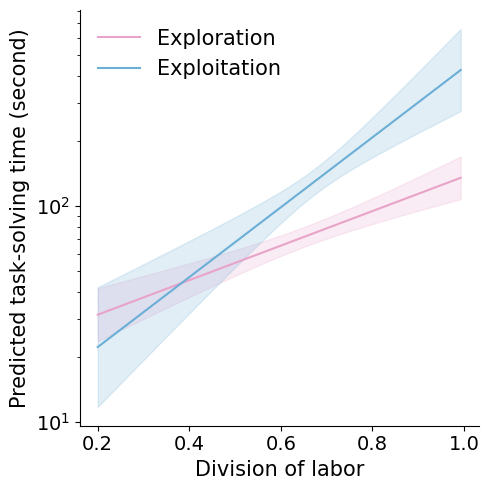

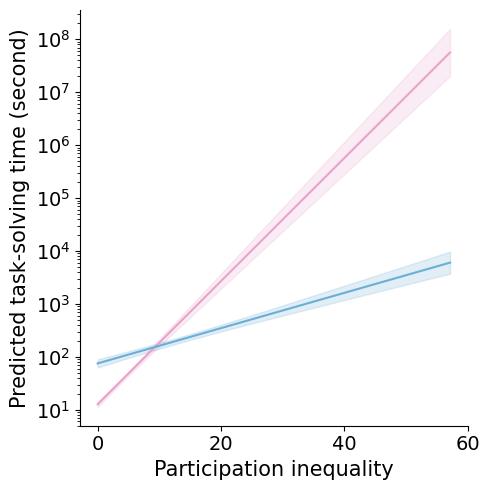

In [22]:
color_palette_task_type=['#e9a3c9', '#6baed6']

# 1st plot: lab. division
fig, ax1 = plt.subplots(figsize=(5, 5))

for task_type, color in zip([0, 1], color_palette_task_type):  # 0 = Exploration, 1 = Exploitation
    subset = interaction_df_cc[interaction_df_cc['task_type_x'] == task_type]
    ax1.plot(subset['normalized_avg_cc'], subset['predicted'], label='Exploration' if task_type == 0 else 'Exploitation', color=color)
    ax1.fill_between(subset['normalized_avg_cc'], subset['ci_lower'], subset['ci_upper'], color=color, alpha=0.2)

ax1.set_xlabel('Division of labor', fontsize=15)
ax1.set_ylabel('Predicted task-solving time (second)', fontsize=15)
ax1.tick_params(axis='both', labelsize=14)
plt.gca().set_axisbelow(True)
#ax1.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax1.legend(loc='upper left', fontsize=15, frameon=False, fancybox=False, edgecolor='none')
ax1.set_yscale('log')

plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()


# 2nd plot: particip. inequality
fig, ax2 = plt.subplots(figsize=(5, 5))  

for task_type, color in zip([0, 1], color_palette_task_type):
    subset = interaction_df_ineq[interaction_df_ineq['task_type_x'] == task_type]
    ax2.plot(subset['std_of_initiated_interaction_counts_SEQ'], subset['predicted'], label='exploration' if task_type == 0 else 'exploitation', color=color)
    ax2.fill_between(subset['std_of_initiated_interaction_counts_SEQ'], subset['ci_lower'], subset['ci_upper'], color=color, alpha=0.2)

ax2.set_xlabel('Participation inequality', fontsize=15)
ax2.set_ylabel('Predicted task-solving time (second)', fontsize=15)
ax2.tick_params(axis='both', labelsize=14)
#ax2.legend(loc='upper center', fontsize=12)
plt.gca().set_axisbelow(True)
#ax2.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax2.set_yscale('log')

plt.tight_layout()
sns.despine()
plt.grid(False)
plt.show()

### Emotional load of communication as an additional layer to structure

In [23]:
model3 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + normalized_avg_cc + std_of_initiated_interaction_counts_SEQ + task_type_x:normalized_avg_cc + task_type_x:std_of_initiated_interaction_counts_SEQ + age + education + gender_blau + acq_avg + meetfre_avg + bin_num + ratio_pos + ratio_neg', 
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model3.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      760
Model Family:                   Gamma   Df Model:                           13
Link Function:                    log   Scale:                         0.91424
Method:                          IRLS   Log-Likelihood:                -3941.3
Date:                Sun, 15 Dec 2024   Deviance:                       651.62
Time:                        17:53:27   Pearson chi2:                     695.
No. Iterations:                    41   Pseudo R-squ. (CS):             0.8399
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.4186      0.363      1.153      0.249      -0.293       1.130
task_type_x                                             0.5408      0.467      1.159      0.246      -0.374       1.455
normalized_avg_cc                                       1.8810      0.279      6.741      0.000       1.334       2.428
std_of_initiated_interaction_counts_SEQ                 0.2672      0.009     29.258      0.000       0.249       0.285
task_type_x:normalized_avg_cc                           1.8623      0.677      2.750      0.006       0.535       3.190
task_type_x:std_of_initiated_interaction_counts_SEQ    -0.1902      0.010    -18.319      0.000      -0.211      -0.170
age                                                     0.0197      0.006      3.276      0.001       0.008       0.032
education                                               0.0202      0.062      0.327      0.744      -0.101       0.141
gender_blau                                             0.2648      0.227      1.168      0.243      -0.179       0.709
acq_avg                                                -0.0075      0.008     -0.953      0.341      -0.023       0.008
meetfre_avg                                             0.0100      0.042      0.238      0.812      -0.073       0.093
bin_num                                                 0.0227      0.097      0.233      0.816      -0.168       0.214
ratio_pos                                               0.6426      0.280      2.297      0.022       0.094       1.191
ratio_neg                                               1.2010      0.329      3.646      0.000       0.555       1.847
=======================================================================================================================
"""

In [24]:
M3signed_main_coef_df=extract_coef_df(model3)
M3signed_main_coef_df

,Coefficient,Exp(Coefficient),Percentage Change (%)
Intercept,0.418597,1.519828,51.982767
task_type_x,0.540764,1.717319,71.731901
normalized_avg_cc,1.880990,6.559996,555.999591
std_of_initiated_interaction_counts_SEQ,0.267215,1.306322,30.632186
task_type_x:normalized_avg_cc,1.862265,6.438301,543.830057
task_type_x:std_of_initiated_interaction_counts_SEQ,-0.190185,0.826807,-17.319344
age,0.019745,1.019941,1.994137
education,0.020191,1.020396,2.039631
gender_blau,0.264806,1.303178,30.317751
acq_avg,-0.007481,0.992547,-0.745303


- **both Pos and Neg communication increases TST, Neg has a slightly stronger effect**

- everything else stays as it was

In [25]:
### EMOTIONS + STRUCTURE

model3_1 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + normalized_avg_cc + std_of_initiated_interaction_counts_SEQ + task_type_x:normalized_avg_cc + task_type_x:std_of_initiated_interaction_counts_SEQ + age + education + gender_blau + acq_avg + meetfre_avg + bin_num + ratio_pos + ratio_neg + ratio_neg:normalized_avg_cc + ratio_pos:normalized_avg_cc + ratio_neg*std_of_initiated_interaction_counts_SEQ + ratio_pos*std_of_initiated_interaction_counts_SEQ', 
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model3_1.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      756
Model Family:                   Gamma   Df Model:                           17
Link Function:                    log   Scale:                         0.90378
Method:                          IRLS   Log-Likelihood:                -3939.8
Date:                Sun, 15 Dec 2024   Deviance:                       650.55
Time:                        17:53:27   Pearson chi2:                     683.
No. Iterations:                    57   Pseudo R-squ. (CS):             0.8435
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.3381      0.379      0.893      0.372      -0.404       1.080
task_type_x                                             0.6039      0.470      1.284      0.199      -0.318       1.525
normalized_avg_cc                                       1.9857      0.322      6.162      0.000       1.354       2.617
std_of_initiated_interaction_counts_SEQ                 0.2702      0.010     26.948      0.000       0.251       0.290
task_type_x:normalized_avg_cc                           1.7735      0.683      2.598      0.009       0.436       3.111
task_type_x:std_of_initiated_interaction_counts_SEQ    -0.1905      0.010    -18.424      0.000      -0.211      -0.170
age                                                     0.0195      0.006      3.254      0.001       0.008       0.031
education                                               0.0214      0.062      0.346      0.729      -0.100       0.142
gender_blau                                             0.2575      0.226      1.141      0.254      -0.185       0.700
acq_avg                                                -0.0073      0.008     -0.927      0.354      -0.023       0.008
meetfre_avg                                             0.0104      0.042      0.249      0.804      -0.072       0.093
bin_num                                                 0.0234      0.098      0.239      0.811      -0.168       0.215
ratio_pos                                               0.7506      1.137      0.660      0.509      -1.478       2.979
ratio_neg                                               2.6971      1.142      2.362      0.018       0.460       4.935
ratio_neg:normalized_avg_cc                            -2.3133      1.565     -1.478      0.139      -5.380       0.754
ratio_pos:normalized_avg_cc                             0.0978      1.700      0.058      0.954      -3.235       3.430
ratio_neg:std_of_initiated_interaction_counts_SEQ       0.0170      0.061      0.278      0.781      -0.103       0.137
ratio_pos:std_of_initiated_interaction_counts_SEQ      -0.0484      0.044     -1.104      0.270      -0.134       0.038
=======================================================================================================================
"""

In [26]:
M3_1_task_ratio_coef_df=extract_coef_df(model3_1)
M3_1_task_ratio_coef_df

,Coefficient,Exp(Coefficient),Percentage Change (%)
Intercept,0.338122,1.402312,40.231195
task_type_x,0.603933,1.829300,82.929972
normalized_avg_cc,1.985739,7.284426,628.442578
std_of_initiated_interaction_counts_SEQ,0.270211,1.310240,31.024038
task_type_x:normalized_avg_cc,1.773519,5.891550,489.154955
task_type_x:std_of_initiated_interaction_counts_SEQ,-0.190499,0.826546,-17.345351
age,0.019533,1.019725,1.972494
education,0.021366,1.021596,2.159577
gender_blau,0.257467,1.293650,29.364951
acq_avg,-0.007280,0.992747,-0.725337


- **network structure and communication -> no significant joined effect**

In [27]:
### EMOTIONS + TASK TYPE

model3_2 = smf.glm(formula='time_elapsed_SEQ ~ task_type_x + normalized_avg_cc + std_of_initiated_interaction_counts_SEQ + task_type_x:normalized_avg_cc + task_type_x:std_of_initiated_interaction_counts_SEQ + age + education + gender_blau + acq_avg + meetfre_avg + bin_num + ratio_pos + ratio_neg + ratio_pos:std_of_initiated_interaction_counts_SEQ + ratio_neg:std_of_initiated_interaction_counts_SEQ + ratio_pos:normalized_avg_cc + ratio_neg:normalized_avg_cc + ratio_pos*task_type_x + ratio_neg*task_type_x ',
                 #+ ratio_neg:task_type + ratio_pos:task_type
                 data=df_with_controls_filtered, 
                 family=sm.families.Gamma(link=sm.families.links.log())).fit()

model3_2.summary()

C:\Users\rebek\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       time_elapsed_SEQ   No. Observations:                  774
Model:                            GLM   Df Residuals:                      754
Model Family:                   Gamma   Df Model:                           19
Link Function:                    log   Scale:                         0.89571
Method:                          IRLS   Log-Likelihood:                -3932.2
Date:                Sun, 15 Dec 2024   Deviance:                       638.19
Time:                        17:53:27   Pearson chi2:                     675.
No. Iterations:                    56   Pseudo R-squ. (CS):             0.8488
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               0.2406      0.377      0.638      0.524      -0.499       0.980
task_type_x                                             0.9328      0.478      1.952      0.051      -0.004       1.870
normalized_avg_cc                                       1.9884      0.321      6.193      0.000       1.359       2.618
std_of_initiated_interaction_counts_SEQ                 0.2705      0.010     26.261      0.000       0.250       0.291
task_type_x:normalized_avg_cc                           1.4211      0.682      2.083      0.037       0.084       2.758
task_type_x:std_of_initiated_interaction_counts_SEQ    -0.1925      0.010    -18.683      0.000      -0.213      -0.172
age                                                     0.0202      0.006      3.381      0.001       0.008       0.032
education                                               0.0268      0.062      0.435      0.663      -0.094       0.147
gender_blau                                             0.2226      0.225      0.990      0.322      -0.218       0.663
acq_avg                                                -0.0078      0.008     -0.995      0.320      -0.023       0.008
meetfre_avg                                             0.0240      0.042      0.573      0.567      -0.058       0.106
bin_num                                                 0.0212      0.097      0.218      0.828      -0.169       0.212
ratio_pos                                               0.7647      1.132      0.676      0.499      -1.454       2.983
ratio_neg                                               2.8029      1.137      2.466      0.014       0.575       5.031
ratio_pos:std_of_initiated_interaction_counts_SEQ       0.0504      0.047      1.064      0.287      -0.042       0.143
ratio_neg:std_of_initiated_interaction_counts_SEQ      -0.1354      0.070     -1.924      0.054      -0.273       0.003
ratio_pos:normalized_avg_cc                             0.5177      1.702      0.304      0.761      -2.819       3.854
ratio_neg:normalized_avg_cc                            -2.4945      1.558     -1.601      0.109      -5.549       0.560
ratio_pos:task_type_x                                  -3.2023      0.754     -4.246      0.000      -4.681      -1.724
ratio_neg:task_type_x                                   3.7526      1.150      3.263      0.001       1.498       6.007
=======================================================================================================================
"""

- **Neg + exploitation = increased TST**
- **Pos + exploitation = reduced TST**

In [28]:
# Df for pos ratio interaction
ratio_pos_vals = np.linspace(df_with_controls_filtered['ratio_pos'].min(), 
                             df_with_controls_filtered['ratio_pos'].max(), 100)

exploration_ratio_pos_df = pd.DataFrame({
    'ratio_pos': ratio_pos_vals,
    'task_type_x': 0,  
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),
    'education': df_with_controls_filtered['education'].mean(),
    'gender_blau': df_with_controls_filtered['gender_blau'].mean(),
    'acq_avg': df_with_controls_filtered['acq_avg'].mean(),
    'meetfre_avg': df_with_controls_filtered['meetfre_avg'].mean(),
    'bin_num': df_with_controls_filtered['bin_num'].mean(),
    'ratio_neg': df_with_controls_filtered['ratio_neg'].mean(),
    'age': df_with_controls_filtered['age'].mean()
})

exploitation_ratio_pos_df = pd.DataFrame({
    'ratio_pos': ratio_pos_vals,
    'task_type_x': 1,
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),
    'education': df_with_controls_filtered['education'].mean(),
    'gender_blau': df_with_controls_filtered['gender_blau'].mean(),
    'acq_avg': df_with_controls_filtered['acq_avg'].mean(),
    'meetfre_avg': df_with_controls_filtered['meetfre_avg'].mean(),
    'bin_num': df_with_controls_filtered['bin_num'].mean(),
    'ratio_neg': df_with_controls_filtered['ratio_neg'].mean(),
    'age': df_with_controls_filtered['age'].mean()
})

interaction_ratio_pos_df = pd.concat([exploration_ratio_pos_df, exploitation_ratio_pos_df])
interaction_ratio_pos_df = get_predictions_and_ci(interaction_ratio_pos_df, model3_2)

# Df for neg ratio interaction
ratio_neg_vals = np.linspace(df_with_controls_filtered['ratio_neg'].min(), 
                             df_with_controls_filtered['ratio_neg'].max(), 100)

exploration_ratio_neg_df = pd.DataFrame({
    'ratio_neg': ratio_neg_vals,
    'task_type_x': 0,
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),
    'education': df_with_controls_filtered['education'].mean(),
    'gender_blau': df_with_controls_filtered['gender_blau'].mean(),
    'acq_avg': df_with_controls_filtered['acq_avg'].mean(),
    'meetfre_avg': df_with_controls_filtered['meetfre_avg'].mean(),
    'bin_num': df_with_controls_filtered['bin_num'].mean(),
    'ratio_pos': df_with_controls_filtered['ratio_pos'].mean(),
    'age': df_with_controls_filtered['age'].mean()
})

exploitation_ratio_neg_df = pd.DataFrame({
    'ratio_neg': ratio_neg_vals,
    'task_type_x': 1,
    'normalized_avg_cc': df_with_controls_filtered['normalized_avg_cc'].mean(),
    'std_of_initiated_interaction_counts_SEQ': df_with_controls_filtered['std_of_initiated_interaction_counts_SEQ'].mean(),
    'education': df_with_controls_filtered['education'].mean(),
    'gender_blau': df_with_controls_filtered['gender_blau'].mean(),
    'acq_avg': df_with_controls_filtered['acq_avg'].mean(),
    'meetfre_avg': df_with_controls_filtered['meetfre_avg'].mean(),
    'bin_num': df_with_controls_filtered['bin_num'].mean(),
    'ratio_pos': df_with_controls_filtered['ratio_pos'].mean(),
    'age': df_with_controls_filtered['age'].mean()
})

interaction_ratio_neg_df = pd.concat([exploration_ratio_neg_df, exploitation_ratio_neg_df])
interaction_ratio_neg_df = get_predictions_and_ci(interaction_ratio_neg_df, model3_2)

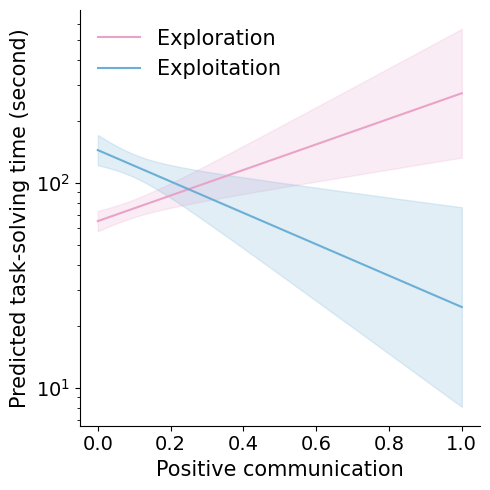

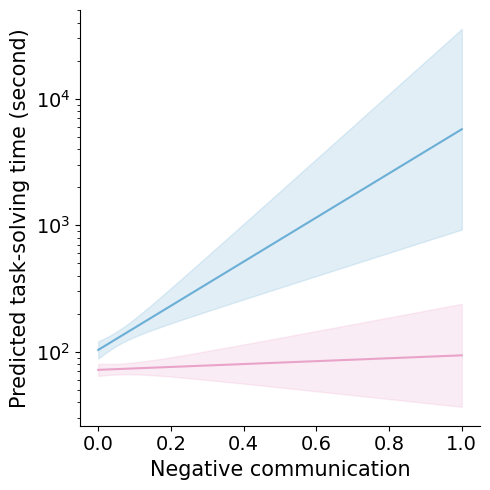

In [29]:
# 1st plot: positive communication interaction effect
color_palette_task_type=['#e9a3c9', '#6baed6']
fig, ax1 = plt.subplots(figsize=(5, 5)) 

for task_type, color in zip([0, 1], color_palette_task_type):  # 0 = Exploration, 1 = Exploitation
    subset = interaction_ratio_pos_df[interaction_ratio_pos_df['task_type_x'] == task_type]
    ax1.plot(subset['ratio_pos'], subset['predicted'], label='Exploration' if task_type == 0 else 'Exploitation', color=color)
    ax1.fill_between(subset['ratio_pos'], subset['ci_lower'], subset['ci_upper'], color=color, alpha=0.2)


ax1.set_xlabel('Positive communication', fontsize=15)
ax1.set_ylabel('Predicted task-solving time (second)', fontsize=15)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(loc='upper left', fontsize=15, frameon=False, fancybox=False, edgecolor='none')
#ax1.grid(True, zorder=0)
ax1.set_yscale('log')
plt.gca().set_axisbelow(True)
#plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()
sns.despine()
plt.show()


# 2nd plot: negative communication interaction effect
fig, ax2 = plt.subplots(figsize=(5, 5))

for task_type, color in zip([0, 1], color_palette_task_type):  # 0 = Exploration, 1 = Exploitation
    subset = interaction_ratio_neg_df[interaction_ratio_neg_df['task_type_x'] == task_type]
    ax2.plot(subset['ratio_neg'], subset['predicted'], label='Exploration' if task_type == 0 else 'Exploitation', color=color)
    ax2.fill_between(subset['ratio_neg'], subset['ci_lower'], subset['ci_upper'], color=color, alpha=0.2)


ax2.set_xlabel('Negative communication', fontsize=15)
ax2.set_ylabel('Predicted task-solving time (second)', fontsize=15)
ax2.tick_params(axis='both', labelsize=14)
#ax2.legend(fontsize=12)
ax2.set_yscale('log')  
#plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.gca().set_axisbelow(True)

plt.tight_layout()
sns.despine()
plt.show()

### 3-way interactions 

-- large complexity, no additional value

In [30]:
# model4 = smf.glm(formula='time_elapsed_SEQ ~ task_type * normalized_avg_cc * ratio_pos + '
#                              'task_type * normalized_avg_cc * ratio_neg + '
#                              'task_type * std_of_initiated_interaction_counts_SEQ * ratio_pos +'
#                              'task_type * std_of_initiated_interaction_counts_SEQ * ratio_neg +'
#                              'std_of_initiated_interaction_counts_SEQ + '
#                              'task_type*std_of_initiated_interaction_counts_SEQ + '
#                              'task_type*normalized_avg_cc +' 
#                              'education + age + gender_blau + acq_avg + meetfre_avg + bin_num + '
#                              'ratio_pos * std_of_initiated_interaction_counts_SEQ + '
#                              'ratio_neg * std_of_initiated_interaction_counts_SEQ + '
#                              'ratio_pos * normalized_avg_cc + ratio_neg * normalized_avg_cc + '
#                              'ratio_neg * task_type + ratio_pos * task_type',
#                  data=df_with_controls_filtered,
#                  family=sm.families.Gamma(link=sm.families.links.log())).fit()

# # Check the summary of the model
# model4.summary()

# Model performance 

(imported from R)

In [31]:
## from R
data_r2 = {
    'Model': ['Model 0', 'Model 0', 'Model 0', 
              'Model 1', 'Model 1', 'Model 1', 
              'Model 2', 'Model 2', 'Model 2', 
              'Model 3', 'Model 3', 'Model 3',
              'Model 3_1', 'Model 3_1', 'Model 3_1',
              'Model 3_2', 'Model 3_2', 'Model 3_2'],
    'Metric': ['McFadden_R2', 'r2ML', 'r2CU', 
               'McFadden_R2', 'r2ML', 'r2CU', 
               'McFadden_R2', 'r2ML', 'r2CU', 
               'McFadden_R2', 'r2ML', 'r2CU',
               'McFadden_R2', 'r2ML', 'r2CU',
               'McFadden_R2', 'r2ML', 'r2CU'],
    'Value': [0.03045, 0.29549, 0.29549,  # Model 0 values
              0.09270, 0.65569, 0.65570,  # Model 1 values
              0.11413, 0.73091, 0.73092,  # Model 2 values
              0.11581, 0.73606, 0.73606,  # Model 3 values
              0.11597, 0.73655, 0.73656,  # Model 3_1 values
              0.11786, 0.74220, 0.74221]  # Model 3_2 values
}

In [32]:
df_r2 = pd.DataFrame(data_r2)
df_r2 = df_r2[df_r2['Metric'] == 'r2CU'].reset_index(drop=True) # filter for Nagelkerke R2

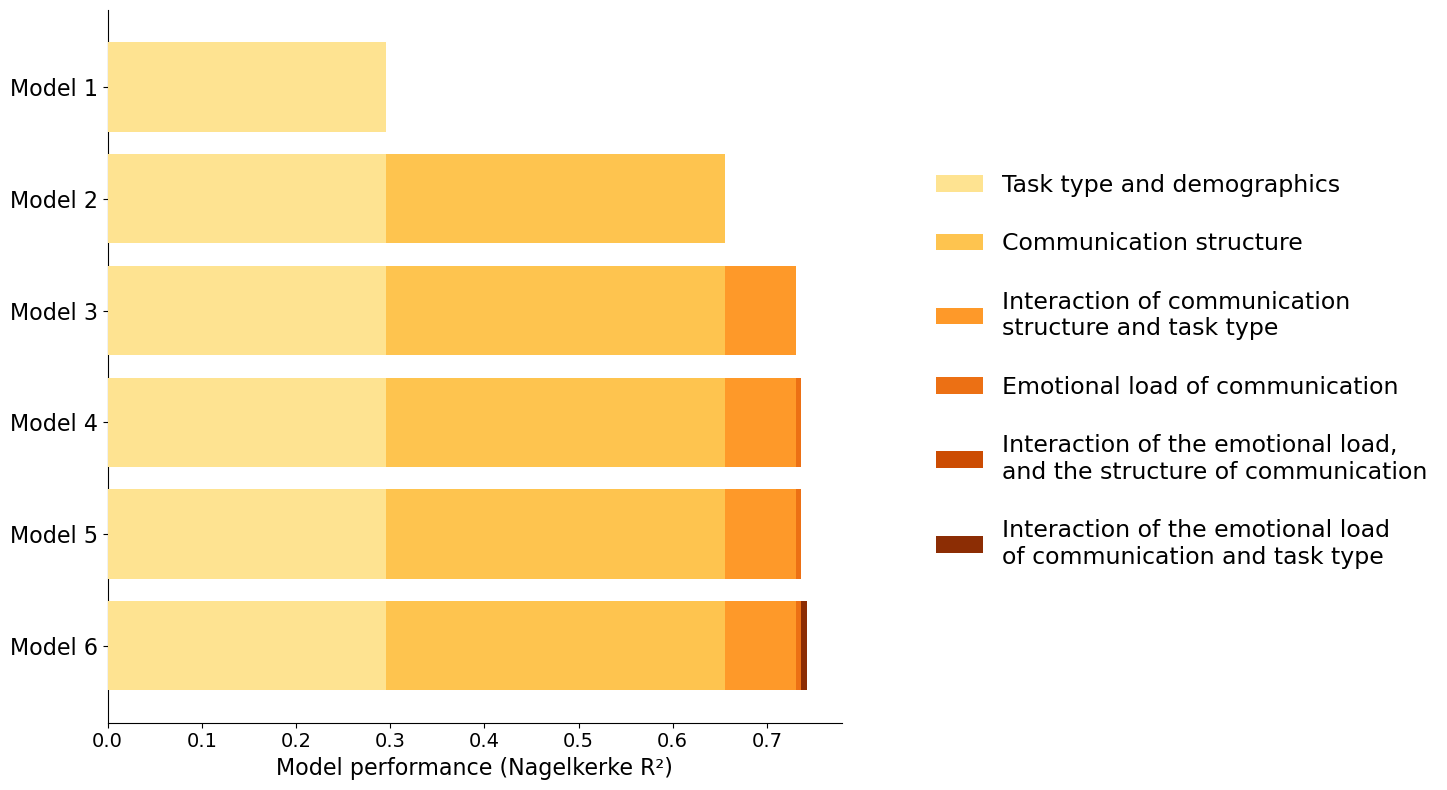

In [33]:
# calc incremental increases in R2 for each model
df_r2['Increment'] = df_r2['Value'].diff().fillna(df_r2['Value'])


color_palette_increments = ["#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04"]

custom_labels = ["Task type and demographics", "Communication structure", "Interaction of communication\nstructure and task type", 
                 "Emotional load of communication", "Interaction of the emotional load,\nand the structure of communication", "Interaction of the emotional load\nof communication and task type"]

custom_model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 
                      'Model 5', 'Model 6']


r2_big = plt.figure(figsize=(15, 8))

# cumulative bottom positions - initialize
bottom = np.zeros(len(df_r2))

for i in range(len(df_r2)):
    # incremental increases stacked on top of the previous increments
    for j in range(i + 1):  # include all previous increments for each model
        plt.barh(df_r2['Model'][i], df_r2['Increment'][j], left=bottom[i], 
                 color=color_palette_increments[j], label=custom_labels[j] if i == j else "", zorder=3)
        # update bottom position for the next increment
        bottom[i] += df_r2['Increment'][j]


plt.yticks(ticks=range(len(custom_model_names)), labels=custom_model_names, fontsize=16)
plt.xticks(fontsize=14)


plt.gca().invert_yaxis()

plt.xlabel('Model performance (Nagelkerke R²)', fontsize=16)

plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1.1, .8), 
    fontsize=17,          
    markerscale=2,       
    labelspacing=1.5,    
    frameon=False      
)

plt.tight_layout()
sns.despine()
plt.show()

To assess the model fit, we report Nagelkerke R2, a pseudo-R2 measure. Nagelkerke R2 modifies Cox & Snell's R2 to ensure the value can reach 1, making it more comparable to the traditional R2 used in ordinary least squares (OLS) regression models. 

The modesl explain ~75% of the variability in the outcome variable, which is considered a very strong fit. It means that the predictors in the model are highly effective in explaining the variation in the dependent variable.

predictive and reliable models, Nagelkerke is a fit measure on a 0-1 scale -- easier interpretability

-----------------------------------------------------------------------------------

### Point estimate plots for visualizing regression models

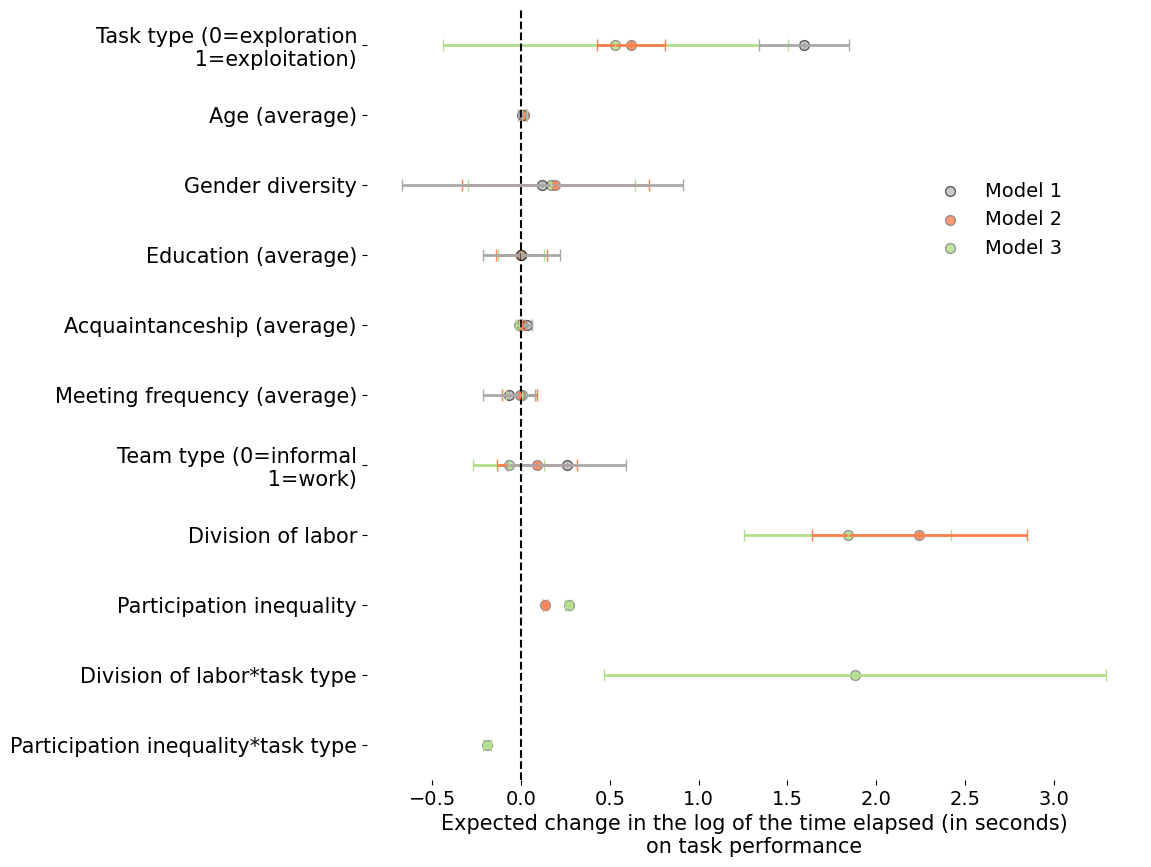

In [34]:
custom_palette = sns.color_palette(["#b2df8a", "coral", "darkgrey"])
colors = sns.color_palette(custom_palette)

# coeffs to percentage change
def convert_to_percentage(df):
    df['coef_pct'] = (np.exp(df['coef']) - 1) * 100
    df['lower_ci_pct'] = (np.exp(df['lower_ci']) - 1) * 100
    df['upper_ci_pct'] = (np.exp(df['upper_ci']) - 1) * 100
    return df

# model summary as a dataframe
summary_df_M1 = pd.DataFrame({
    "coef": model0.params,
    "std_err": model0.bse,
    "t_value": model0.tvalues,
    "p_value": model0.pvalues,
    "lower_ci": model0.conf_int()[0],
    "upper_ci": model0.conf_int()[1]
})
summary_df_M1.index.name = 'variable'
summary_df_M1.reset_index(inplace=True)

summary_df_M2 = pd.DataFrame({
    "coef": model1.params,
    "std_err": model1.bse,
    "t_value": model1.tvalues,
    "p_value": model1.pvalues,
    "lower_ci": model1.conf_int()[0],
    "upper_ci": model1.conf_int()[1]
})
summary_df_M2.index.name = 'variable'
summary_df_M2.reset_index(inplace=True)

summary_df_M3 = pd.DataFrame({
    "coef": model2.params,
    "std_err": model2.bse,
    "t_value": model2.tvalues,
    "p_value": model2.pvalues,
    "lower_ci": model2.conf_int()[0],
    "upper_ci": model2.conf_int()[1]
})
summary_df_M3.index.name = 'variable'
summary_df_M3.reset_index(inplace=True)

rename_coef_dict = {
    'Intercept': 'Constant',
    'task_type_x': 'Task type (0=exploration, 1=exploitation)',
    'normalized_avg_cc': 'Division of labor',
    'std_of_initiated_interaction_counts_SEQ': 'Participation inequality',
    'age':'Age (average)',
    'education': 'Education (average)',
    'gender_blau': 'Gender diversity',
    'acq_avg': 'Acquaintanceship (average)',
    'meetfre_avg': 'Meeting frequency (average)',
    'bin_num': 'Team type (0=informal, 1=work)',
     'task_type_x:normalized_avg_cc': "Division of labor*task type",
    'task_type_x:std_of_initiated_interaction_counts_SEQ': "Participation inequality*task type",
}

# update variable order
variable_order = [
    'Task type (0=exploration, 1=exploitation)', 
    'Age (average)',
    'Gender diversity', 
    'Education (average)',
    'Acquaintanceship (average)', 
    'Meeting frequency (average)', 
    'Team type (0=informal, 1=work)',
    'Division of labor', 
    'Participation inequality', 
    'Division of labor*task type', 
    'Participation inequality*task type',
]

# rename the vars in the df
summary_df_M1['variable'] = summary_df_M1['variable'].replace(rename_coef_dict)
summary_df_M2['variable'] = summary_df_M2['variable'].replace(rename_coef_dict)
summary_df_M3['variable'] = summary_df_M3['variable'].replace(rename_coef_dict)
summary_df_M3['variable'] = pd.Categorical(summary_df_M3['variable'], categories=variable_order, ordered=True)
summary_df_M3 = summary_df_M3.sort_values('variable')


summary_df_M1['variable'] = pd.Categorical(summary_df_M1['variable'], categories=variable_order, ordered=True)
summary_df_M2['variable'] = pd.Categorical(summary_df_M2['variable'], categories=variable_order, ordered=True)
summary_df_M3['variable'] = pd.Categorical(summary_df_M3['variable'], categories=variable_order, ordered=True)

# ordering
summary_df_M1 = summary_df_M1.sort_values('variable')
summary_df_M2 = summary_df_M2.sort_values('variable')
summary_df_M3 = summary_df_M3.sort_values('variable')

summary_df_M1 = summary_df_M1.dropna(subset=['variable'])
summary_df_M2 = summary_df_M2.dropna(subset=['variable'])
summary_df_M3 = summary_df_M3.dropna(subset=['variable'])


def insert_line_breaks(variable_name):
    #variable_name = variable_name.replace('(', '\n(')
    #variable_name = variable_name.replace('*', '\n*')
    variable_name = variable_name.replace(',', '\n')
    return variable_name

summary_df_M1['variable'] = summary_df_M1['variable'].apply(insert_line_breaks)
summary_df_M2['variable'] = summary_df_M2['variable'].apply(insert_line_breaks)
summary_df_M3['variable'] = summary_df_M3['variable'].apply(insert_line_breaks)

###############################################################################
models1_3=plt.figure(figsize=(10, 10))

# Model M3
for i, row in summary_df_M3.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[0], ecolor=colors[0], elinewidth=2, capsize=4, label='Model 3' if i == 0 else None)

# Model M2
for i, row in summary_df_M2.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[1], ecolor=colors[1], elinewidth=2, capsize=4, label='Model 2' if i == 0 else None)
    
# Model M1
for i, row in summary_df_M1.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[2], ecolor=colors[2], elinewidth=2, capsize=4, label='Model 1' if i == 0 else None)

# scatter points
scatter_M3 = plt.scatter(summary_df_M3['coef'], summary_df_M3['variable'], 
            color=colors[0], s=50, edgecolor='grey', alpha=0.8, label='Model 3')
scatter_M2 = plt.scatter(summary_df_M2['coef'], summary_df_M2['variable'], 
            color=colors[1], s=50, edgecolor='grey', alpha=0.8, label='Model 2')
scatter_M1 = plt.scatter(summary_df_M1['coef'], summary_df_M1['variable'], 
            color=colors[2], s=50, edgecolor='black', alpha=0.6, label='Model 1')


plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.xlabel('Expected change in the log of the time elapsed (in seconds)\non task performance', fontsize=15)
plt.gca().invert_yaxis() 
plt.xticks(fontsize=14)
plt.yticks(fontsize=15, color='black')
plt.legend(handles=[scatter_M1, scatter_M2, scatter_M3], loc='upper right', bbox_to_anchor=(0.92, 0.8), fontsize=14, frameon=False)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.box(False)
plt.show()

The coefficient 1.6 represents the change in the log of the time elapsed (in seconds) for a one-unit increase in the predictor x.


To interpret on the original scale of time elapsed ==> exponentiate the coeff:

exp(1.6)=4.95

==> for every one-unit increase in x, the time elapsed is multiplied by approximately 4.95 (a nearly 395% increase in the time elapsed).
==> a one-unit increase in the predictor x results in the time elapsed being roughly 4.95 times longer than before

In [35]:
summary_df_M4 = pd.DataFrame({
    "coef": model3.params,
    "std_err": model3.bse,
    "t_value": model3.tvalues,
    "p_value": model3.pvalues,
    "lower_ci": model3.conf_int()[0],
    "upper_ci": model3.conf_int()[1]
})
summary_df_M4.index.name = 'variable'
summary_df_M4.reset_index(inplace=True)

summary_df_M5 = pd.DataFrame({
    "coef": model3_1.params,
    "std_err": model3_1.bse,
    "t_value": model3_1.tvalues,
    "p_value": model3_1.pvalues,
    "lower_ci": model3_1.conf_int()[0],
    "upper_ci": model3_1.conf_int()[1]
})
summary_df_M5.index.name = 'variable'
summary_df_M5.reset_index(inplace=True)

summary_df_M6 = pd.DataFrame({
    "coef": model3_2.params,
    "std_err": model3_2.bse,
    "t_value": model3_2.tvalues,
    "p_value": model3_2.pvalues,
    "lower_ci": model3_2.conf_int()[0],
    "upper_ci": model3_2.conf_int()[1]
})
summary_df_M6.index.name = 'variable'
summary_df_M6.reset_index(inplace=True)

rename_coef_dict = {
    'Intercept': 'Constant',
    'task_type_x': 'Task type (0=explor., 1=exploit.)',
    'normalized_avg_cc': 'Division of labor',
    'std_of_initiated_interaction_counts_SEQ': 'Participation inequality',
    'ratio_pos': 'Positive communication',
    'ratio_neg': 'Negative communiation',
    "task_type_x:normalized_avg_cc":"Division of labor*task type",
     "ratio_pos:normalized_avg_cc":"Division of labor*positive communication",
     "ratio_neg:normalized_avg_cc":"Division of labor*negative communication",
    "task_type_x:std_of_initiated_interaction_counts_SEQ":"Participation inequality*task type",
    'ratio_pos:std_of_initiated_interaction_counts_SEQ':'Participation inequality*positive communication',
    'ratio_neg:std_of_initiated_interaction_counts_SEQ':'Participation inequality*negative communication',
    'ratio_pos:task_type_x':'Positive communication*task type',
    'ratio_neg:task_type_x':'Negative communication*task type',
    'education': 'Education (average)',
    'age':'Age (average)',
    'gender_blau': 'Gender diversity',
    'acq_avg': 'Acquaintanceship (average)',
    'meetfre_avg': 'Meeting frequency (average)',
    'bin_num': 'Team type (0=informal, 1=work)',
}

variable_order = [
    'Task type (0=explor., 1=exploit.)', 
    'Age (average)',
    'Gender diversity', 
    'Education (average)',
    'Acquaintanceship (average)', 
    'Meeting frequency (average)', 
    'Team type (0=informal, 1=work)',
    'Division of labor', 
    'Participation inequality', 
    'Division of labor*task type', 
    'Participation inequality*task type',
    'Positive communication',
     'Negative communiation',
     "Division of labor*positive communication",
     "Division of labor*negative communication",
    'Participation inequality*positive communication',
    'Participation inequality*negative communication',
    'Positive communication*task type',
    'Negative communication*task type',
    
]

summary_df_M4['variable'] = summary_df_M4['variable'].replace(rename_coef_dict)
summary_df_M5['variable'] = summary_df_M5['variable'].replace(rename_coef_dict)
summary_df_M6['variable'] = summary_df_M6['variable'].replace(rename_coef_dict)

summary_df_M6['variable'] = pd.Categorical(summary_df_M6['variable'], categories=variable_order, ordered=True)
summary_df_M6 = summary_df_M6.sort_values('variable')

summary_df_M4['variable'] = pd.Categorical(summary_df_M4['variable'], categories=variable_order, ordered=True)
summary_df_M5['variable'] = pd.Categorical(summary_df_M5['variable'], categories=variable_order, ordered=True)
summary_df_M6['variable'] = pd.Categorical(summary_df_M6['variable'], categories=variable_order, ordered=True)

summary_df_M4 = summary_df_M4.sort_values('variable')
summary_df_M5 = summary_df_M5.sort_values('variable')
summary_df_M6 = summary_df_M6.sort_values('variable')


summary_df_M4 = summary_df_M4.dropna(subset=['variable'])
summary_df_M5 = summary_df_M5.dropna(subset=['variable'])
summary_df_M6 = summary_df_M6.dropna(subset=['variable'])

summary_df_M5 = summary_df_M5[summary_df_M5['variable'] != 'Constant']
summary_df_M4 = summary_df_M4[summary_df_M4['variable'] != 'Constant']
summary_df_M6 = summary_df_M6[summary_df_M6['variable'] != 'Constant']

In [36]:
def insert_line_breaks(variable_name):
    variable_name = variable_name.replace('(', '\n(') 
    variable_name = variable_name.replace('*', '\n*') 
    #variable_name = variable_name.replace(',', '\n')
    return variable_name

summary_df_M4['variable'] = summary_df_M4['variable'].apply(insert_line_breaks)
summary_df_M5['variable'] = summary_df_M5['variable'].apply(insert_line_breaks)
summary_df_M6['variable'] = summary_df_M6['variable'].apply(insert_line_breaks)


sns.set(style="whitegrid")
custom_palette = sns.color_palette(["turquoise","#8da0cb",'#d8b365'])
colors = sns.color_palette(custom_palette) 

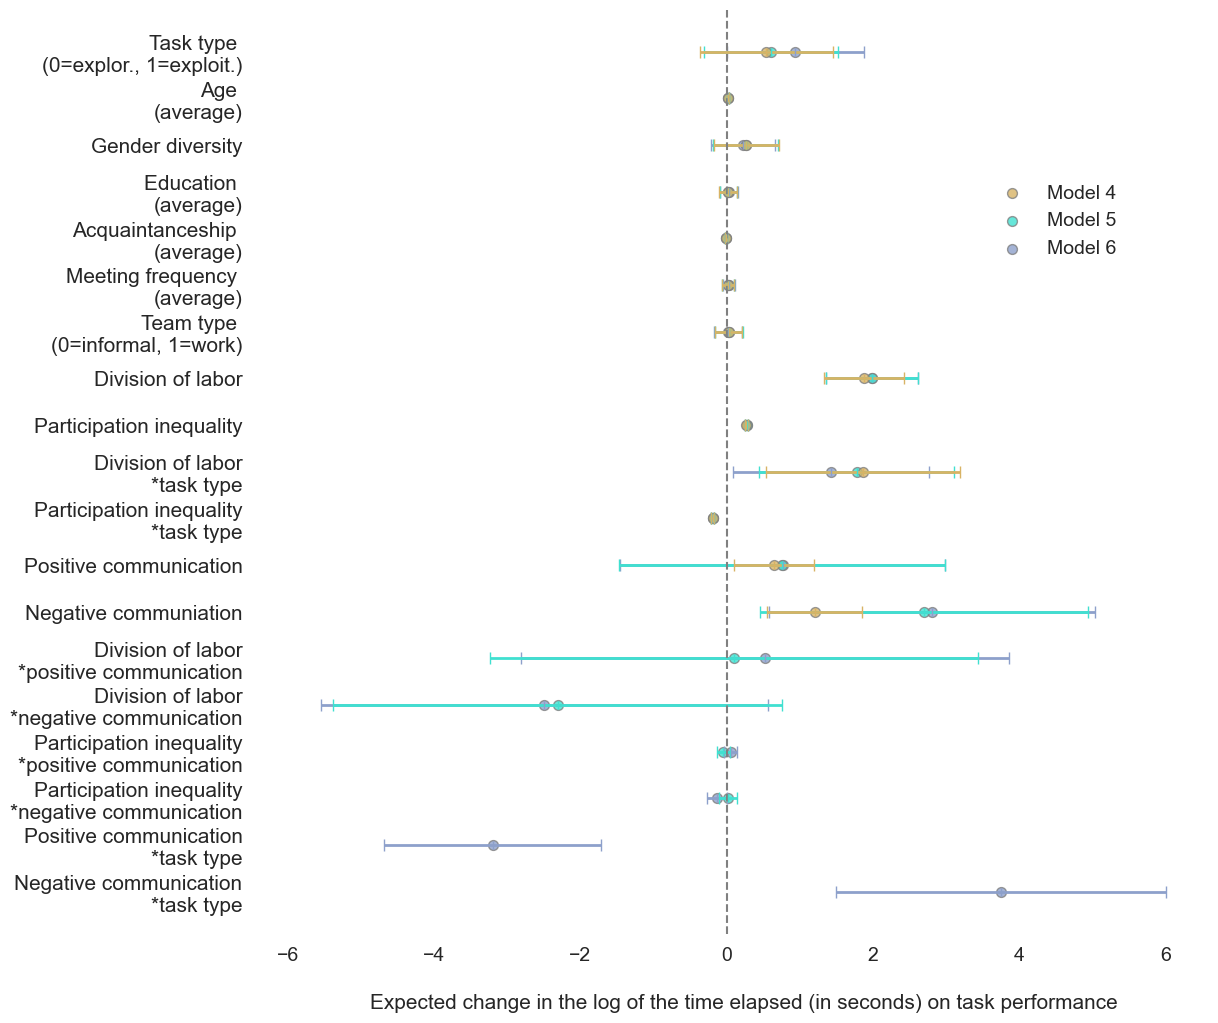

In [37]:
models4_6=plt.figure(figsize=(12, 12))

# M6
for i, row in summary_df_M6.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[1], ecolor=colors[1], elinewidth=2, capsize=4, label='Model 6' if i == 0 else None)

# M5
for i, row in summary_df_M5.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[0], ecolor=colors[0], elinewidth=2, capsize=4, label='Model 5' if i == 0 else None)

# M4
for i, row in summary_df_M4.iterrows():
    plt.errorbar(row['coef'], row['variable'],
                 xerr=[[row['coef'] - row['lower_ci']], [row['upper_ci'] - row['coef']]],
                 fmt='|', color=colors[2], ecolor=colors[2], elinewidth=2, capsize=4, label='Model 4' if i == 0 else None)

scatter_M6 = plt.scatter(summary_df_M6['coef'], summary_df_M6['variable'], 
            color=colors[1], s=50, edgecolor='grey', alpha=0.8, label='Model 6')
scatter_M5 = plt.scatter(summary_df_M5['coef'], summary_df_M5['variable'], 
            color=colors[0], s=50, edgecolor='grey', alpha=0.8, label='Model 5')
scatter_M4 = plt.scatter(summary_df_M4['coef'], summary_df_M4['variable'], 
            color=colors[2], s=50, edgecolor='grey', alpha=0.8, label='Model 4')


plt.axvline(x=0, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel('Expected change in the log of the time elapsed (in seconds) on task performance', fontsize=15, labelpad=21)

plt.gca().invert_yaxis() 
plt.xticks(fontsize=14)

plt.yticks(fontsize=15)

plt.gca().yaxis.set_tick_params(pad=20)


plt.legend(handles=[scatter_M4, scatter_M5, scatter_M6], fontsize=14, loc='upper right', bbox_to_anchor=(0.92, 0.83), frameon=False)  # Put M4 first, then M5
plt.grid(False)#, linestyle='--', alpha=0.6)
plt.box(False)
plt.show()

## No. of intermediate tasks 

-- conditional approach

-- Fig 3B

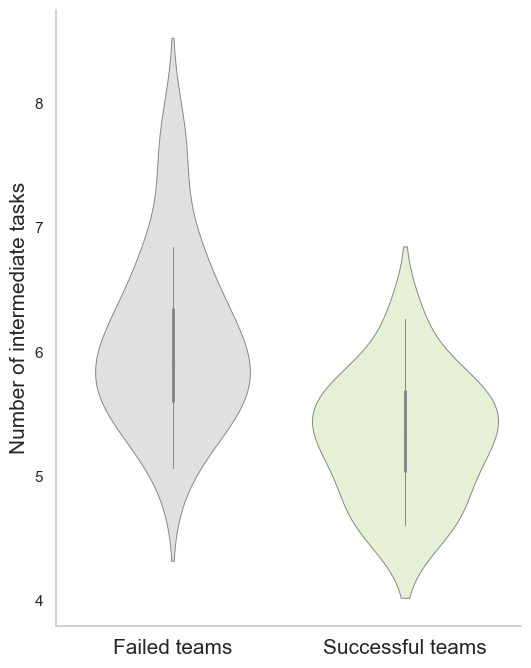

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,8))

sns.violinplot(
    x=df_with_controls_filtered[['team','nr_of_interim_tasks','team_success']].groupby('team').mean()['team_success'], 
    y=df_with_controls_filtered[['team','nr_of_interim_tasks','team_success']].groupby('team').mean()['nr_of_interim_tasks'], 
    palette=['#e0e0e0','#e6f5d0'],  
    alpha=0.4,                    
    linewidth=0.7                 
)

plt.ylabel('Number of intermediate tasks', fontsize=15)
plt.xlabel('', fontsize=14)
plt.xticks([0, 1], ['Failed teams', 'Successful teams'], fontsize=15)
plt.grid(False)
sns.despine()
plt.show()